# Laboratorio 3: Analisis y visualización de Datos

La idea en esta tarea es crear una (1) visualización en base a un grupo de datos del DEMRE que pueden ser sacados desde esta pagina: https://demre.cl/portales/portal-bases-datosEnlaces a un sitio externo.. La única condición es que debe ser una visualización menos convencional (o sea, no puede ser ni gráficos de líneas, ni de barras, ni de dispersión, ni de torta, ni de área).

La entrega debe ser una versión PDF del Jupyter notebook usado para las visualizaciones, además del archivo .ipynb como respaldo. Sólo se evaluará la imagen final, todo comentario extra no será tomado en cuenta para la nota final. La recomendación es seguir la idea de las visualizaciones del The Economist que se hicieron en la Tarea 2.

Recomiendo, especialmente para aquellas personas con mas tiempo y experiencia en Python, entregar mas de una visualizacion, en cuyo caso la nota final de la tarea correspondera a la mejor nota entre todas las visualizaciones.



## ***Introducción***

El presente análisis utiliza un dataset provisto por el DEMRE (Departamento de Evaluación, Medición y Registro Educacional) correspondiente al proceso de admisión 2024. Este dataset contiene información detallada sobre los postulantes a la educación universitaria en Chile, con variables que describen los puntajes obtenidos en las distintas pruebas y características asociadas al proceso de admisión.

El análisis busca realizar una visualización geográfica de los puntajes promedio obtenidos por región en la Prueba de Transición Universitaria (PTU), utilizando puntajes de NEM (Notas de Enseñanza Media) y Ranking.

Visualización coroplética: Desplegar la distribución de los puntajes promedio por región, utilizando datos como el PTJE NEM y Ranking. Combinar los datos del archivo CSV con un shapefile de las regiones de Chile para generar el mapa.

### Descripción del Dataset: `ArchivoC_Adm2024.csv`

El dataset principal contiene la siguiente estructura:

| **Columna**            | **Descripción**                                                                 |
|------------------------|---------------------------------------------------------------------------------|
| `ID_aux`               | Identificador único del postulante.                                              |
| `RBD`                  | Código del colegio donde cursó la educación media.                               |
| `COD_ENS`              | Código del tipo de enseñanza del postulante.                                     |
| `GRUPO_DEPENDENCIA`     | Grupo de dependencia del establecimiento educacional (público, privado, etc.).   |
| `RAMA_EDUCACIONAL`      | Rama educacional a la que pertenece el colegio del postulante.                   |
| `SITUACION_EGRESO`      | Situación de egreso del postulante.                                              |
| `CODIGO_REGION`         | Código de la región donde reside el postulante.                                  |
| `CODIGO_COMUNA`         | Código de la comuna donde reside el postulante.                                  |
| `PROMEDIO_NOTAS`        | Promedio de notas de la educación media del postulante.                          |
| `PORC_SUP_NOTAS`        | Indica si pertenece al porcentaje superior de notas del establecimiento.         |
| `PTJE_NEM`              | Puntaje obtenido basado en el promedio de notas de la educación media.           |
| `PTJE_RANKING`          | Puntaje de ranking de notas.                                                     |
| `CLEC_REG_ACTUAL`       | Puntaje de la prueba de comprensión lectora (rendición regular).                 |
| `MATE1_REG_ACTUAL`      | Puntaje de la prueba de matemática (rendición regular).                          |
| `MATE2_REG_ACTUAL`      | Puntaje de la prueba de matemática nivel avanzado (rendición regular).           |
| `HCSOC_REG_ACTUAL`      | Puntaje de la prueba de ciencias sociales (rendición regular).                   |
| `CIEN_REG_ACTUAL`       | Puntaje de la prueba de ciencias (rendición regular).                            |
| `MODULO_REG_ACTUAL`     | Puntaje del módulo especializado de la prueba (rendición regular).               |
| `CLEC_INV_ACTUAL`       | Puntaje de la prueba de comprensión lectora (rendición de invierno).             |
| `MATE1_INV_ACTUAL`      | Puntaje de la prueba de matemática (rendición de invierno).                      |
| `MATE2_INV_ACTUAL`      | Puntaje de la prueba de matemática nivel avanzado (rendición de invierno).       |
| `HCSOC_INV_ACTUAL`      | Puntaje de la prueba de ciencias sociales (rendición de invierno).               |
| `CIEN_INV_ACTUAL`       | Puntaje de la prueba de ciencias (rendición de invierno).                        |
| `MODULO_INV_ACTUAL`     | Puntaje del módulo especializado de la prueba (rendición de invierno).           |



Descripción del Dataset: Libro_CódigosADM2024_ArchivoC.xlsx

El archivo Excel proporciona una descripción adicional de las variables del dataset principal. A continuación se detallan algunas de las variables más relevantes:

1. ID_aux: Identificador único del postulante.
2. PROMEDIO_NOTAS: Promedio de las notas obtenidas en la educación media.
3. PORC_SUP_NOTAS: Indica si el postulante se encuentra en el porcentaje superior de notas en su establecimiento.
4. PTJE_NEM: Puntaje NEM, que corresponde al puntaje estándar asignado según el promedio de notas del postulante.
5. PTJE_RANKING: Puntaje de ranking, basado en la posición relativa de las notas del postulante con respecto a sus compañeros.
6. CODIGO_REGION: Código de la región geográfica en la que reside el postulante, utilizado para los análisis geográficos.

El Excel también contiene anexos que detallan los códigos de las comunas y regiones, lo que facilita la asociación entre los códigos de región presentes en el dataset y sus nombres correspondientes.

Conclusión

Este análisis busca proporcionar una comprensión geográfica de los puntajes de los postulantes a través de un mapa coroplético. Al visualizar los puntajes promedio por región, se espera identificar tendencias y patrones en el rendimiento académico, con el objetivo de explorar posibles factores geográficos que influyan en los resultados de los postulantes.

# 1. Análisis Exploratorio de Datos

In [23]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# --- Cargar el dataset CSV ---
csv_file_path = r'C:\Entorno_Desarrollo_UDD\Visualizacion_de_la_Informacion\data\Rinden_Admisión2024_DEMRE\ArchivoC_Adm2024.csv'  # Asegúrate de ajustar la ruta correcta
df_rendicion_demre = pd.read_csv(csv_file_path, sep=';', low_memory=False)

## 1.1 Revisión Inicial

In [24]:
# --- Visualizar las primeras filas del dataset --- 
df_rendicion_demre.head()   

,ID_aux,RBD,COD_ENS,GRUPO_DEPENDENCIA,RAMA_EDUCACIONAL,SITUACION_EGRESO,CODIGO_REGION,CODIGO_COMUNA,PROMEDIO_NOTAS,PORC_SUP_NOTAS,...,MATE1_REG_ANTERIOR,MATE2_REG_ANTERIOR,HCSOC_REG_ANTERIOR,CIEN_REG_ANTERIOR,MODULO_REG_ANTERIOR,CLEC_INV_ANTERIOR,MATE_INV_ANTERIOR,HCSOC_INV_ANTERIOR,CIEN_INV_ANTERIOR,MODULO_INV_ANTERIOR
0,id_0000900470001,10399.0,410.0,3.0,T1,5,13.0,13301.0,"5,38",40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,id_0000900470008,8553.0,363.0,3.0,H2,5,13.0,13127.0,"5,85",30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,id_0001900470101,25502.0,363.0,2.0,H2,5,13.0,13107.0,"5,2",30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,id_0001900470177,NaN,NaN,NaN,NaN,1,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,id_0001900670170,40320.0,310.0,2.0,H1,5,1.0,1101.0,"6,33",10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# --- Visualizar las columnas del dataset ---
df_rendicion_demre.dtypes

ID_aux                  object
RBD                    float64
COD_ENS                float64
GRUPO_DEPENDENCIA      float64
RAMA_EDUCACIONAL        object
SITUACION_EGRESO         int64
CODIGO_REGION          float64
CODIGO_COMUNA          float64
PROMEDIO_NOTAS          object
PORC_SUP_NOTAS           int64
PTJE_NEM                 int64
PTJE_RANKING             int64
CLEC_REG_ACTUAL        float64
MATE1_REG_ACTUAL       float64
MATE2_REG_ACTUAL       float64
HCSOC_REG_ACTUAL       float64
CIEN_REG_ACTUAL        float64
MODULO_REG_ACTUAL       object
CLEC_INV_ACTUAL        float64
MATE1_INV_ACTUAL       float64
MATE2_INV_ACTUAL       float64
HCSOC_INV_ACTUAL       float64
CIEN_INV_ACTUAL        float64
MODULO_INV_ACTUAL       object
CLEC_REG_ANTERIOR      float64
MATE1_REG_ANTERIOR     float64
MATE2_REG_ANTERIOR     float64
HCSOC_REG_ANTERIOR     float64
CIEN_REG_ANTERIOR      float64
MODULO_REG_ANTERIOR     object
CLEC_INV_ANTERIOR      float64
MATE_INV_ANTERIOR      float64
HCSOC_IN

In [26]:
# Visualizar los atributos del dataset y el tipo de dato
df_rendicion_demre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306497 entries, 0 to 306496
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID_aux               306497 non-null  object 
 1   RBD                  301597 non-null  float64
 2   COD_ENS              301597 non-null  float64
 3   GRUPO_DEPENDENCIA    301597 non-null  float64
 4   RAMA_EDUCACIONAL     301597 non-null  object 
 5   SITUACION_EGRESO     306497 non-null  int64  
 6   CODIGO_REGION        303240 non-null  float64
 7   CODIGO_COMUNA        301597 non-null  float64
 8   PROMEDIO_NOTAS       306497 non-null  object 
 9   PORC_SUP_NOTAS       306497 non-null  int64  
 10  PTJE_NEM             306497 non-null  int64  
 11  PTJE_RANKING         306497 non-null  int64  
 12  CLEC_REG_ACTUAL      285009 non-null  float64
 13  MATE1_REG_ACTUAL     285009 non-null  float64
 14  MATE2_REG_ACTUAL     285009 non-null  float64
 15  HCSOC_REG_ACTUAL 

In [27]:
df_rendicion_demre.isnull().sum()

ID_aux                      0
RBD                      4900
COD_ENS                  4900
GRUPO_DEPENDENCIA        4900
RAMA_EDUCACIONAL         4900
SITUACION_EGRESO            0
CODIGO_REGION            3257
CODIGO_COMUNA            4900
PROMEDIO_NOTAS              0
PORC_SUP_NOTAS              0
PTJE_NEM                    0
PTJE_RANKING                0
CLEC_REG_ACTUAL         21488
MATE1_REG_ACTUAL        21488
MATE2_REG_ACTUAL        21488
HCSOC_REG_ACTUAL        21488
CIEN_REG_ACTUAL         21488
MODULO_REG_ACTUAL      138056
CLEC_INV_ACTUAL        276743
MATE1_INV_ACTUAL       276743
MATE2_INV_ACTUAL       276743
HCSOC_INV_ACTUAL       276743
CIEN_INV_ACTUAL        276743
MODULO_INV_ACTUAL      288288
CLEC_REG_ANTERIOR      240344
MATE1_REG_ANTERIOR     240344
MATE2_REG_ANTERIOR     240344
HCSOC_REG_ANTERIOR     240344
CIEN_REG_ANTERIOR      240344
MODULO_REG_ANTERIOR    260473
CLEC_INV_ANTERIOR      299148
MATE_INV_ANTERIOR      299148
HCSOC_INV_ANTERIOR     299148
CIEN_INV_A

In [28]:
df_rendicion_demre.head()

,ID_aux,RBD,COD_ENS,GRUPO_DEPENDENCIA,RAMA_EDUCACIONAL,SITUACION_EGRESO,CODIGO_REGION,CODIGO_COMUNA,PROMEDIO_NOTAS,PORC_SUP_NOTAS,...,MATE1_REG_ANTERIOR,MATE2_REG_ANTERIOR,HCSOC_REG_ANTERIOR,CIEN_REG_ANTERIOR,MODULO_REG_ANTERIOR,CLEC_INV_ANTERIOR,MATE_INV_ANTERIOR,HCSOC_INV_ANTERIOR,CIEN_INV_ANTERIOR,MODULO_INV_ANTERIOR
0,id_0000900470001,10399.0,410.0,3.0,T1,5,13.0,13301.0,"5,38",40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,id_0000900470008,8553.0,363.0,3.0,H2,5,13.0,13127.0,"5,85",30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,id_0001900470101,25502.0,363.0,2.0,H2,5,13.0,13107.0,"5,2",30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,id_0001900470177,NaN,NaN,NaN,NaN,1,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,id_0001900670170,40320.0,310.0,2.0,H1,5,1.0,1101.0,"6,33",10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Filtrar el dataset para la Región Metropolitana (código de región: 13)
df_rendicion_demre_RM = df_rendicion_demre[df_rendicion_demre['CODIGO_REGION'] == 13]
df_rendicion_demre_RM.head()

,ID_aux,RBD,COD_ENS,GRUPO_DEPENDENCIA,RAMA_EDUCACIONAL,SITUACION_EGRESO,CODIGO_REGION,CODIGO_COMUNA,PROMEDIO_NOTAS,PORC_SUP_NOTAS,...,MATE1_REG_ANTERIOR,MATE2_REG_ANTERIOR,HCSOC_REG_ANTERIOR,CIEN_REG_ANTERIOR,MODULO_REG_ANTERIOR,CLEC_INV_ANTERIOR,MATE_INV_ANTERIOR,HCSOC_INV_ANTERIOR,CIEN_INV_ANTERIOR,MODULO_INV_ANTERIOR
0,id_0000900470001,10399.0,410.0,3.0,T1,5,13.0,13301.0,"5,38",40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,id_0000900470008,8553.0,363.0,3.0,H2,5,13.0,13127.0,"5,85",30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,id_0001900470101,25502.0,363.0,2.0,H2,5,13.0,13107.0,"5,2",30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,id_0002900470225,31030.0,310.0,2.0,H1,5,13.0,13109.0,"5,13",70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,id_0002900770272,25215.0,410.0,2.0,T1,5,13.0,13124.0,"5,55",30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Convertir las columnas de puntajes a valores numéricos utilizando .loc para evitar el warning
df_rendicion_demre_RM.loc[:, 'PTJE_NEM'] = pd.to_numeric(df_rendicion_demre_RM['PTJE_NEM'], errors='coerce')
df_rendicion_demre_RM.loc[:, 'PTJE_RANKING'] = pd.to_numeric(df_rendicion_demre_RM['PTJE_RANKING'], errors='coerce')

# Agrupar por comuna dentro de la Región Metropolitana y calcular promedios
df_comunas_avg = df_rendicion_demre_RM.groupby('CODIGO_COMUNA').agg({
    'PTJE_NEM': 'mean',
    'PTJE_RANKING': 'mean'
}).reset_index()

# Imprimir los resultados de los promedios calculados para la Región Metropolitana por comuna
print("Promedios calculados para la Región Metropolitana por comuna:")
print(df_comunas_avg.head())



Promedios calculados para la Región Metropolitana por comuna:
   CODIGO_COMUNA    PTJE_NEM  PTJE_RANKING
0        13101.0  694.421872    708.561698
1        13102.0  648.094385    677.285544
2        13103.0  623.610915    651.357394
3        13104.0  620.853075    642.796128
4        13105.0  673.958154    692.147972


In [31]:
"""# Convertir las columnas de puntajes a valores numéricos
df_rendicion_demre['PTJE_NEM'] = pd.to_numeric(df_rendicion_demre['PTJE_NEM'], errors='coerce')
df_rendicion_demre['PTJE_RANKING'] = pd.to_numeric(df_rendicion_demre['PTJE_RANKING'], errors='coerce')

# Agrupar por región y calcular promedios
df_region_avg = df_rendicion_demre.groupby('CODIGO_REGION').agg({
    'PTJE_NEM': 'mean',
    'PTJE_RANKING': 'mean'
}).reset_index()

print("Promedios calculados por región:")
print(df_region_avg.head())"""

'# Convertir las columnas de puntajes a valores numéricos\ndf_rendicion_demre[\'PTJE_NEM\'] = pd.to_numeric(df_rendicion_demre[\'PTJE_NEM\'], errors=\'coerce\')\ndf_rendicion_demre[\'PTJE_RANKING\'] = pd.to_numeric(df_rendicion_demre[\'PTJE_RANKING\'], errors=\'coerce\')\n\n# Agrupar por región y calcular promedios\ndf_region_avg = df_rendicion_demre.groupby(\'CODIGO_REGION\').agg({\n    \'PTJE_NEM\': \'mean\',\n    \'PTJE_RANKING\': \'mean\'\n}).reset_index()\n\nprint("Promedios calculados por región:")\nprint(df_region_avg.head())'

In [34]:
df_comunas_avg.head()

,CODIGO_COMUNA,PTJE_NEM,PTJE_RANKING
0,13101.0,694.421872,708.561698
1,13102.0,648.094385,677.285544
2,13103.0,623.610915,651.357394
3,13104.0,620.853075,642.796128
4,13105.0,673.958154,692.147972


In [36]:
# --- Cargar el shapefile de las regiones ---
shapefile_path = r'C:\Entorno_Desarrollo_UDD\Visualizacion_de_la_Informacion\data\Comunas\comunas.shp'  # ruta shapefile

# Leer el shapefile con GeoPandas
comunas_gdf = gpd.read_file(shapefile_path)

# Ver las primeras filas del shapefile
print("Shapefile cargado:")
print(comunas_gdf.head())

Shapefile cargado:
   objectid     shape_leng  dis_elec  cir_sena  cod_comuna  codregion  \
0        48  170038.624165        16         8        6204          6   
1        29  125730.104795        15         8        6102          6   
2        30   63026.084422        15         8        6103          6   
3        31   89840.903562        15         8        6104          6   
4        78  122626.493264        23        11        9121          9   

     st_area_sh     st_length_                                    Region  \
0  9.685774e+08  206184.271675  Región del Libertador Bernardo O'Higgins   
1  4.157446e+08  151911.576827  Región del Libertador Bernardo O'Higgins   
2  1.448565e+08   76355.326122  Región del Libertador Bernardo O'Higgins   
3  3.256572e+08  108874.623150  Región del Libertador Bernardo O'Higgins   
4  6.990727e+08  156680.410681                    Región de La Araucanía   

      Comuna      Provincia                                           geometry  
0  M

In [37]:
# Filtrar el shapefile para la Región Metropolitana
gdf_metropolitana = comunas_gdf[comunas_gdf['codregion'] == 13]
gdf_metropolitana.head()    


,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry
26,330,13987.326781,10,7,13129,13,1.424341e+07,16812.167615,Región Metropolitana de Santiago,San Joaquín,Santiago,"POLYGON ((-7861762.687 -3958307.095, -7861708...."
36,331,13311.641304,13,7,13130,13,1.389538e+07,15988.816037,Región Metropolitana de Santiago,San Miguel,Santiago,"POLYGON ((-7863229.775 -3964360.652, -7863319...."
47,332,11733.486710,13,7,13131,13,9.056280e+06,14061.528858,Región Metropolitana de Santiago,San Ramón,Santiago,"POLYGON ((-7863398.118 -3964354.273, -7863319...."
57,309,11488.695747,9,7,13108,13,1.068637e+07,14088.417488,Región Metropolitana de Santiago,Independencia,Santiago,"POLYGON ((-7865631.125 -3948404.075, -7865643...."
61,310,12797.595762,13,7,13109,13,1.454185e+07,15442.412755,Región Metropolitana de Santiago,La Cisterna,Santiago,"POLYGON ((-7865040.615 -3968217.521, -7865077...."


<Axes: >

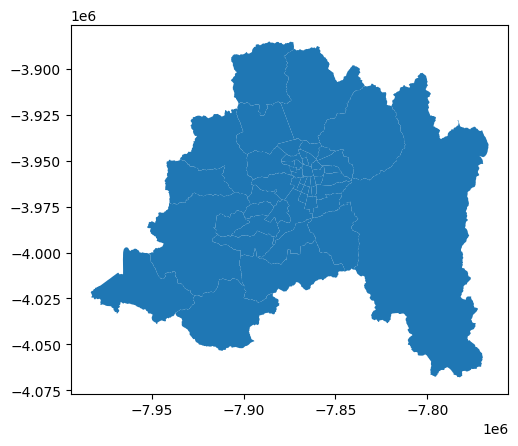

In [38]:
gdf_metropolitana.plot() 

In [39]:
gdf_metropolitana.head()

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry
26,330,13987.326781,10,7,13129,13,1.424341e+07,16812.167615,Región Metropolitana de Santiago,San Joaquín,Santiago,"POLYGON ((-7861762.687 -3958307.095, -7861708...."
36,331,13311.641304,13,7,13130,13,1.389538e+07,15988.816037,Región Metropolitana de Santiago,San Miguel,Santiago,"POLYGON ((-7863229.775 -3964360.652, -7863319...."
47,332,11733.486710,13,7,13131,13,9.056280e+06,14061.528858,Región Metropolitana de Santiago,San Ramón,Santiago,"POLYGON ((-7863398.118 -3964354.273, -7863319...."
57,309,11488.695747,9,7,13108,13,1.068637e+07,14088.417488,Región Metropolitana de Santiago,Independencia,Santiago,"POLYGON ((-7865631.125 -3948404.075, -7865643...."
61,310,12797.595762,13,7,13109,13,1.454185e+07,15442.412755,Región Metropolitana de Santiago,La Cisterna,Santiago,"POLYGON ((-7865040.615 -3968217.521, -7865077...."


In [41]:
# --- Unir los promedios por región con el shapefile ---

# Asegurar que el campo 'codregion' en el shapefile coincide con 'CODIGO_REGION' en el CSV

map_data = gdf_metropolitana.merge(df_comunas_avg, left_on='cod_comuna', right_on='CODIGO_COMUNA', how='left')


# 2. Visualización Mapa Coroplético

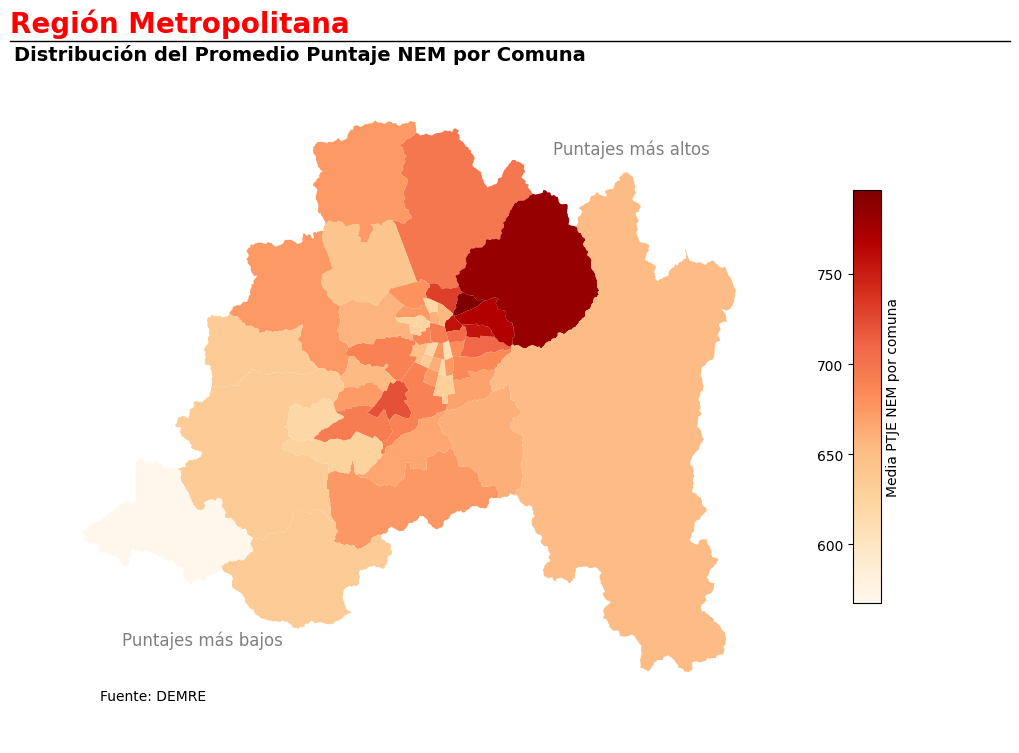

In [167]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Crear el mapa coroplético de puntaje NEM promedio por comuna en la Región Metropolitana
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
map_data_plot = map_data.plot(column='PTJE_NEM', ax=ax, cmap='OrRd', edgecolor=None, legend=False)

# Leyenda 
cbar = fig.colorbar(map_data_plot.get_children()[0], orientation="vertical", pad=0.09, aspect=15, shrink=0.6)
cbar.ax.yaxis.set_ticks_position('left')  # Mover los números de la escala al lado izquierdo
cbar.set_label('Media PTJE NEM por comuna')
cbar.ax.set_position([0.80, 0.1, 0.02, 0.8])  

# Título y subtítulo
plt.suptitle('Región Metropolitana', fontsize=20, color='red', fontweight='bold', ha='left', x=0.00, y=0.98)
plt.title('Distribución del Promedio Puntaje NEM por Comuna', fontsize=14, color='black', fontweight='bold', ha='left', x=-0.05, y=1.04)

# Añadir la línea horizontal para separar el título y el subtítulo
line = mlines.Line2D([0, 1], [0.94, 0.94], color='black', linewidth=1, transform=fig.transFigure, figure=fig)
fig.lines.extend([line])

# Anotaciones
ax.annotate('Puntajes más altos', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, color='grey')
ax.annotate('Puntajes más bajos', xy=(0.1, 0.09), xycoords='axes fraction', fontsize=12, color='grey')    

# Eliminar los ejes del mapa para una mejor presentación
ax.set_axis_off()

# Agregar una fuente para los datos
ax.annotate('Fuente: DEMRE', xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=10, color='black')

# Mostrar la visualización
plt.tight_layout()
plt.show()


### Mapa de Promedio Puntaje NEM por Comuna en la Región Metropolitana

El mapa coroplético muestra la distribución geográfica del **Promedio de Puntaje NEM** en las comunas de la **Región Metropolitana**. A continuación se detallan las principales observaciones:

1. **Desigualdad Geográfica de los Puntajes**:
   - Las comunas ubicadas en el **sector oriente** de la región presentan los **puntajes más altos** de NEM, lo que se refleja en los tonos más oscuros (rojo intenso).
   - En contraste, las comunas en el **sector suroeste** y **sureste** muestran los **puntajes más bajos**, representados por tonos más claros.

2. **Puntajes Más Altos**:
   - La comuna con los puntajes más altos de la región se ubica en la **zona oriente**, lo cual puede estar relacionado con factores socioeconómicos que influyen en el rendimiento académico.

3. **Puntajes Más Bajos**:
   - Las comunas en el **extremo sur** y algunas en el **oeste** presentan los puntajes más bajos, lo que podría señalar desafíos socioeconómicos o educativos en esas áreas.

4. **Disparidad Regional**:
   - El mapa visualiza una clara **disparidad educativa** dentro de la región, mostrando cómo el promedio de puntaje NEM varía significativamente entre diferentes comunas.

5. **Conclusión General**:
   - La visualización permite identificar patrones claros de concentración de puntajes más altos y más bajos, y destaca la necesidad de analizar más profundamente las posibles causas de estas diferencias, ya que pueden estar ligadas a aspectos económicos, sociales o educativos que afectan el rendimiento académico en cada comuna.

Este análisis geográfico puede ser útil para **tomadores de decisiones** que busquen implementar políticas educativas o programas de apoyo en zonas con menores puntajes para reducir la brecha en el rendimiento académico dentro de la región.

---

**Fuente**: DEMRE (Departamento de Evaluación, Medición y Registro Educacional).


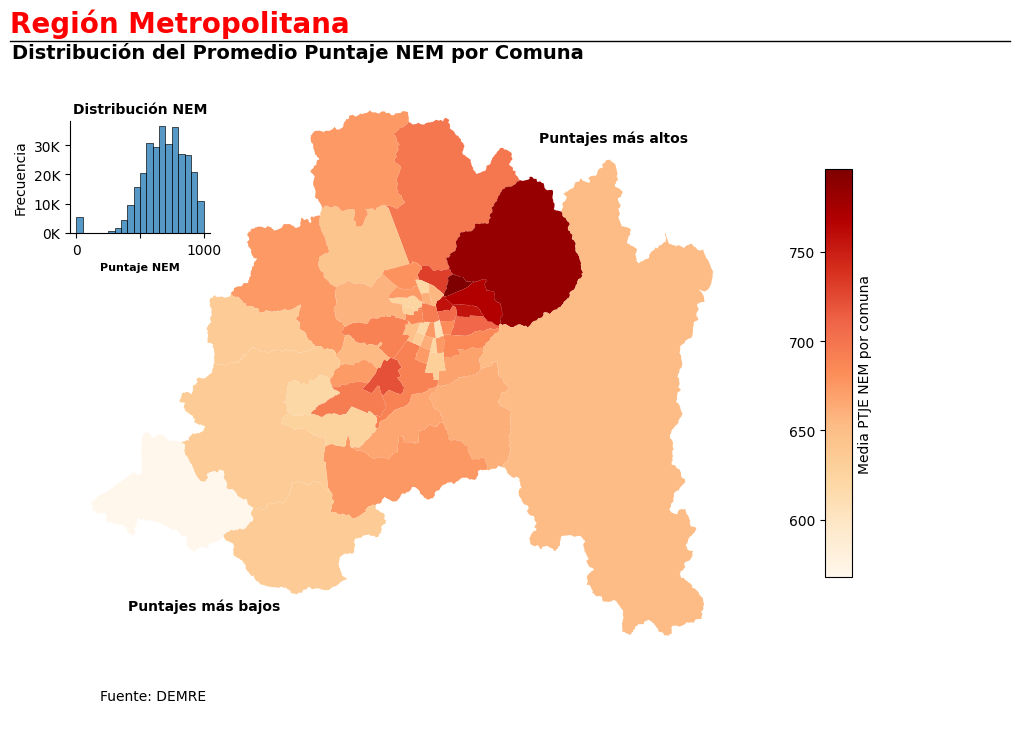

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

# Crear la figura principal con un subplot adicional para el gráfico pequeño
fig, ax1 = plt.subplots(figsize=(10, 8))

# Plot del mapa coroplético de puntaje NEM promedio por comuna en la Región Metropolitana
map_data_plot = map_data.plot(column='PTJE_NEM', ax=ax1, cmap='OrRd', edgecolor=None, legend=False)

# Leyenda 
cbar = fig.colorbar(map_data_plot.get_children()[0], ax=ax1, orientation="vertical", pad=0.09, aspect=15, shrink=0.6)
cbar.ax.yaxis.set_ticks_position('left')  # Mover los números de la escala al lado izquierdo
cbar.set_label('Media PTJE NEM por comuna')

# Título y subtítulo
plt.suptitle('Región Metropolitana', fontsize=20, color='red', fontweight='bold', ha='left', x=0.00, y=0.98)
ax1.set_title('Distribución del Promedio Puntaje NEM por Comuna', fontsize=14, color='black', fontweight='bold', ha='left', x=-0.07, y=1.03)

# Añadir la línea horizontal para separar el título y el subtítulo
line = mlines.Line2D([0, 1], [0.94, 0.94], color='black', linewidth=1, transform=fig.transFigure, figure=fig)
fig.lines.extend([line])

# Anotaciones
ax1.annotate('Puntajes más altos', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10, color='black', fontweight='bold')  
ax1.annotate('Puntajes más bajos', xy=(0.1, 0.09), xycoords='axes fraction', fontsize=10, color='black', fontweight='bold')         

# Eliminar los ejes del mapa para una mejor presentación
ax1.set_axis_off()

# Agregar una fuente para los datos
ax1.annotate('Fuente: DEMRE', xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=10, color='black')

# Crear un nuevo eje (ax2) para el gráfico pequeño 
left, bottom, width, height = [0.06, 0.7, 0.14, 0.14]  
ax2 = fig.add_axes([left, bottom, width, height])

# Gráfico de distribución (histograma) en ax2
sns.histplot(df_rendicion_demre['PTJE_NEM'].dropna(), bins=20, kde=False, ax=ax2)
ax2.set_title('Distribución NEM', fontsize=10, color='black', fontweight='bold')      
ax2.set_xlabel('Puntaje NEM', fontsize=8, color='black', fontweight='bold')
ax2.set_ylabel('Frecuencia')

# Eliminar las líneas del marco
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(True)
ax2.spines['bottom'].set_visible(True)

# Formato compacto de los ejes (frecuencia)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y/1000)}K'))  # Cambia 30000 a 30K
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}' if x in [0, 1000] else ''))

# Ajustar manualmente los márgenes
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.1)

# Mostrar la visualización
plt.show()

